In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [50]:


archivo = np.loadtxt('/Users/samuel/Documents/Universidad/202210/Métodos Computacionales 2/Semana 2/ManchasSolares.dat.txt')


archivo = archivo[archivo[:,0] >=1900]
Years = archivo[:,0]
Months = archivo[:,1]/12
Years += Months
Spots = archivo[:,3]

In [51]:
media = np.mean(Spots)
Spots = Spots - media

In [52]:
X = np.fft.fft(Spots)
XMag = np.abs(X)/len(X)
Frecuencias = np.fft.fftfreq(len(Spots),1)

In [53]:
#Frecuencias_2 = Frecuencias[0:int(len(Frecuencias)/2+1)]
#print(Frecuencias_2)
#X_2 = 2*XMag[0:int(len(Frecuencias)/2+1)]
#plt.stem(Frecuencias_2,X_2, use_line_collection=True)

max_ind = np.argmax(XMag)
frec_dom = Frecuencias[max_ind]
frec_dom
#print(Frecuencias[max_ind])
#XMag[max_ind]
#Frecuencias[max_ind]

0.0078125

In [54]:
mask2 = X != X[max_ind]
X[mask2] = 0
Periodo = (1/frec_dom)/12
#for i in range(len(X)):
    #print(X[i])


In [55]:
New_X = np.fft.ifft(2*X)
Real_New_X = np.real(New_X) + media
New_Spots = Spots + media

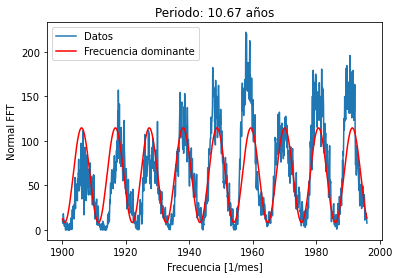

In [56]:
plt.figure()
plt.title('Periodo: {:.2f} años'.format(Periodo))

plt.plot(Years, New_Spots, label = 'Datos')
plt.plot(Years,Real_New_X, color = 'r', label = 'Frecuencia dominante')

plt.xlabel('Frecuencia [1/mes]')
plt.ylabel('Normal FFT')

plt.legend()


In [62]:
#Programa para estimar numéricamente la función Zeta(6) de Riemann 
def f(t):
    func = (1/(16*np.pi))*((((t**3)/3) - ((t*(np.pi**2))/3))**2)
    return func

res, err = integrate.quad(lambda t: f(t), -np.pi, np.pi)
print('Función Zeta(6) de Riemann:{}'.format(res))

Función Zeta(6) de Riemann:1.017343061984449


In [63]:
#¿Cómo escribir LateX?